In [60]:
import networkx as nx
from itertools import product
import time
import matplotlib.pyplot as plt
import random
import pandas as pd


In [61]:
def cut_value(graph, labels):
    total = 0
    for u, v, data in graph.edges(data=True):
        if labels[u] != labels[v]:
            total += data.get("weight", 1)
    return total


In [62]:
def brute_force_max_k_cut(graph, k, start_time, timeout=300):
    nodes = list(graph.nodes())
    n = len(nodes)
    iters = 0
    best_val = -1
    best_labels = None

    for assign in product(range(k), repeat=n):
        iters += 1
        if time.time() - start_time >= timeout:
            break
        labels = {nodes[i]: assign[i] for i in range(n)}
        val = cut_value(graph, labels)
        if val > best_val:
            best_val = val
            best_labels = labels.copy()
    return best_val, best_labels, iters

In [63]:
def format_time(seconds):
    return "{:.10f}".format(seconds)

In [56]:
def plot_graph(graph, colors):
   
    G = nx.Graph(graph)
    node_colors = []
    for node in G.nodes():
        try:
            node_colors.append(colors[node])
        except KeyError:
            print("Čvor", node, "nema dodeljenu grupu.")
            node_colors.append('gray')  # nedodeljeni čvorovi sivi

    nx.draw(G, with_labels=True,
            node_color=node_colors,
            cmap=plt.cm.rainbow,
            node_size=500)
    
    plt.show()

In [40]:
podaci=[] 
graph1 = {
        'A': ['B','C','D'],
        'B': ['A','C'],
        'C': ['A','B','D'],
        'D': ['A','C','E'],
        'E': ['D','F'],
        'F': ['E','G'],
        'G': ['F']
    }

G1 = nx.Graph(graph1)
for u, v in G1.edges():
    G1.edges[u, v]['weight'] = 1


=== PRIMER 1 ===
Najbolja vrednost preseka: 8
Podela čvorova: {'A': 0, 'B': 1, 'C': 2, 'D': 1, 'E': 0, 'F': 1, 'G': 0}
Broj iteracija: 2187
Vreme: 0.0251636505 sekundi


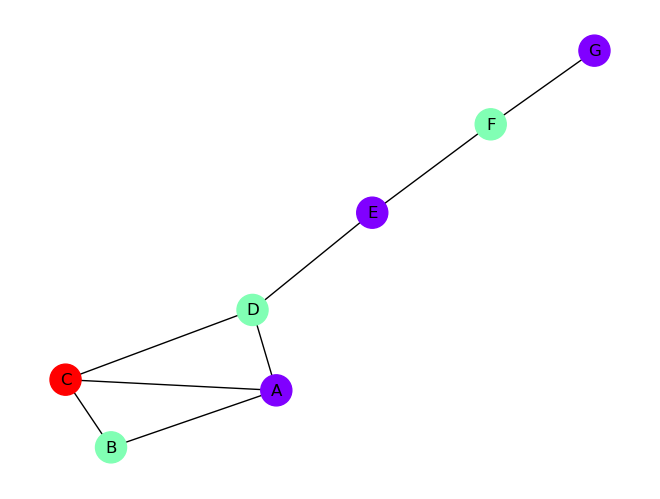

In [42]:
 k = 3
start_time = time.time()
best_val,labels,iters = brute_force_max_k_cut(G1, k, start_time)
end_time = time.time()

print("=== PRIMER 1 ===")
print("Najbolja vrednost preseka:", best_val)
print("Podela čvorova:", labels)
print("Broj iteracija:", iters)
print("Vreme:", format_time(end_time - start_time), "sekundi")
plot_graph(G1, labels)


In [30]:
G2 = nx.Graph()
G2.add_edge('A','B', weight=3)
G2.add_edge('A','C', weight=2)
G2.add_edge('B','C', weight=5)
G2.add_edge('C','D', weight=4)
G2.add_edge('B','D', weight=1)




=== PRIMER 2 ===
Najbolja vrednost preseka: 15
Podela čvorova: {'A': 0, 'B': 1, 'C': 2, 'D': 0}
Broj iteracija: 81
Vreme: 0.0012347698 sekundi


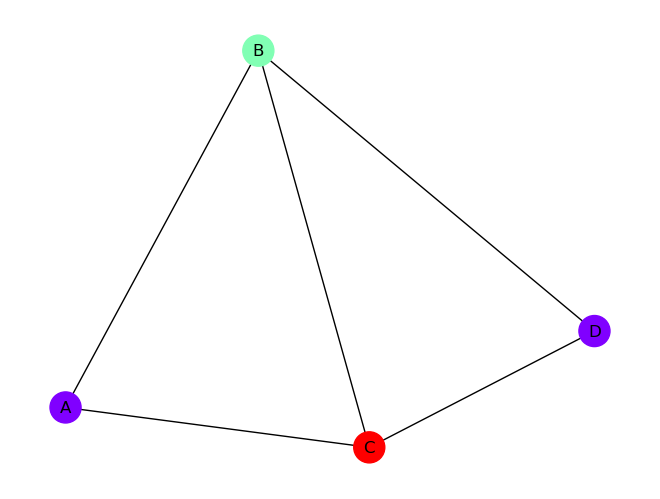

In [31]:
start_time = time.time()
best_val2,labels2,iters2 = brute_force_max_k_cut(G2, k, start_time)
end_time = time.time()

print("\n=== PRIMER 2 ===")
print("Najbolja vrednost preseka:", best_val2)
print("Podela čvorova:", labels2)
print("Broj iteracija:", iters2)
print("Vreme:", format_time(end_time - start_time), "sekundi")
plot_graph(G2, labels2)


In [67]:
n = 30
filename = f"testiranje/graph_{n}.edgelist"
G3 = nx.read_weighted_edgelist(filename, nodetype=int)


=== PRIMER 2 ===
Najbolja vrednost preseka: 366.0
Podela čvorova: {0: 0, 3: 0, 14: 0, 15: 0, 22: 0, 23: 0, 1: 0, 9: 0, 17: 0, 4: 0, 6: 0, 12: 0, 20: 0, 26: 0, 29: 1, 16: 0, 27: 2, 28: 2, 5: 2, 19: 1, 24: 2, 25: 2, 11: 2, 13: 1, 18: 1, 7: 2, 8: 1, 21: 2, 10: 2}
Broj iteracija: 6590256
Vreme: 300.0001425743 sekundi


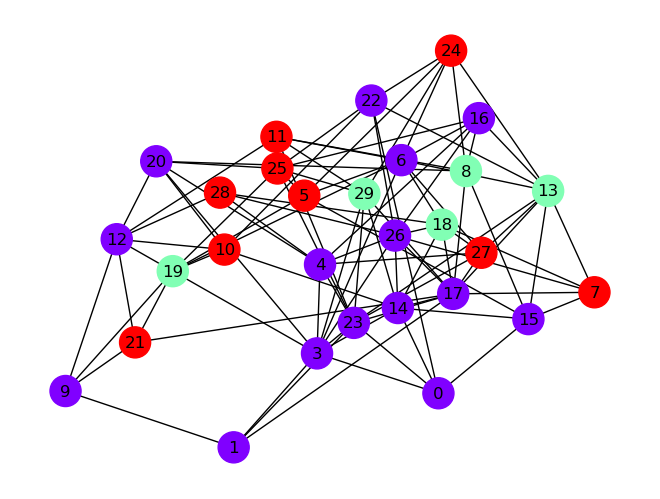

In [68]:
start_time = time.time()
best_val3,labels3,iters3 = brute_force_max_k_cut(G3, k, start_time)
end_time = time.time()

print("\n=== PRIMER 2 ===")
print("Najbolja vrednost preseka:", best_val3)
print("Podela čvorova:", labels3)
print("Broj iteracija:", iters3)
print("Vreme:", format_time(end_time - start_time), "sekundi")
plot_graph(G3, labels3)

In [50]:
# vidimo da je vec sa ovolikim grafom suludno raditi

In [69]:
G4 = nx.gnp_random_graph(10, 0.2, seed=40) 
random.seed(10)
random.seed(10)
for u, v in G4.edges():
    G4[u][v]['weight'] = random.randint(1, 10)


=== Isprobavanje optimalne granice ===
Najbolja vrednost preseka: 66
Podela čvorova: {0: 0, 1: 0, 2: 0, 3: 1, 4: 0, 5: 2, 6: 1, 7: 1, 8: 0, 9: 1}
Broj iteracija: 59049
Vreme: 0.6416347027 sekundi


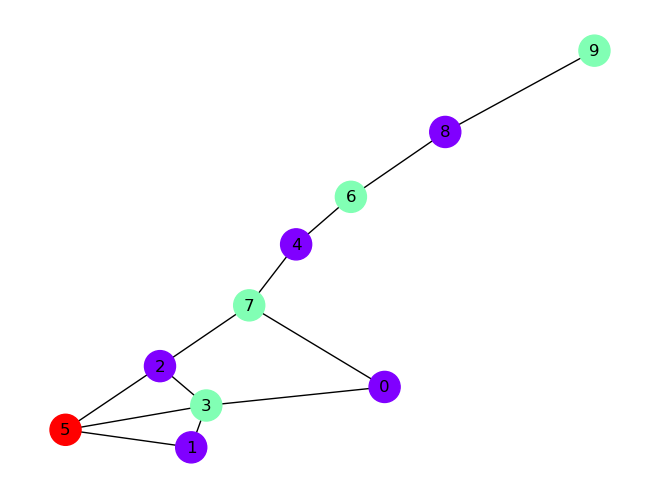

In [70]:
start_time = time.time()
best_val4,labels4,iters4 = brute_force_max_k_cut(G4, k, start_time)
end_time = time.time()

print("\n=== Isprobavanje optimalne granice ===")
print("Najbolja vrednost preseka:", best_val4)
print("Podela čvorova:", labels4)
print("Broj iteracija:", iters4)
print("Vreme:", format_time(end_time - start_time), "sekundi")
plot_graph(G4, labels4)

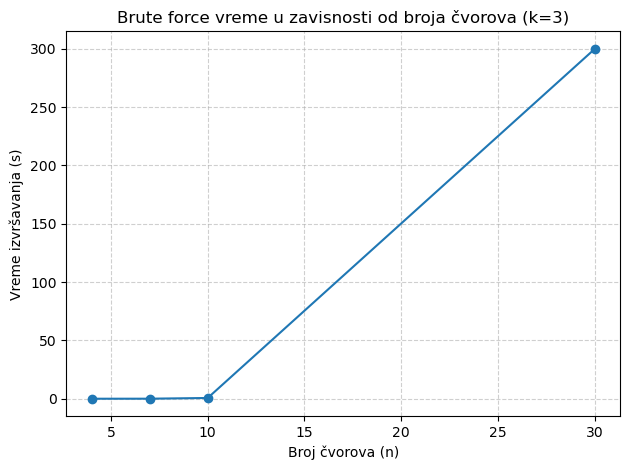

In [71]:
n_values = [4, 7, 10, 30]
times = [0.0012,0.0252,0.6416,300.0001]  

plt.plot(n_values, times, marker='o')
plt.xlabel("Broj čvorova (n)")
plt.ylabel("Vreme izvršavanja (s)")
plt.title("Brute force vreme u zavisnosti od broja čvorova (k=3)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()



In [72]:
df = pd.DataFrame({
    "Broj čvorova (n)": n_values,
    "Vreme izvršavanja (s)": times
})
df


,Broj čvorova (n),Vreme izvršavanja (s)
0,4,0.0012
1,7,0.0252
2,10,0.6416
3,30,300.0001
